<a href="https://colab.research.google.com/github/rajeshbista/McMaster_AI/blob/master/Assignment_4_rajeshbista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## McMaster University, SFWR 4AI3 Artificial Intelligence
# **Assignment 4**
*Rajesh Bista (ID: 400438720)*

---



### Consider the Titanic data set.

**Note: Please notice that you should use the same set of data for the three
classifiers. It means, you should use the first 200 samples for estimating the
parameters of the log-odd function in the logistic regression and MLP and
also samples 201 to 240 for calculating the average penalty of them for
testing their quality.**

**Preparation of data frame**

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [2]:
#Loading required dataframe
df = pd.read_csv('train.csv')
df.head(200)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q


<Axes: >

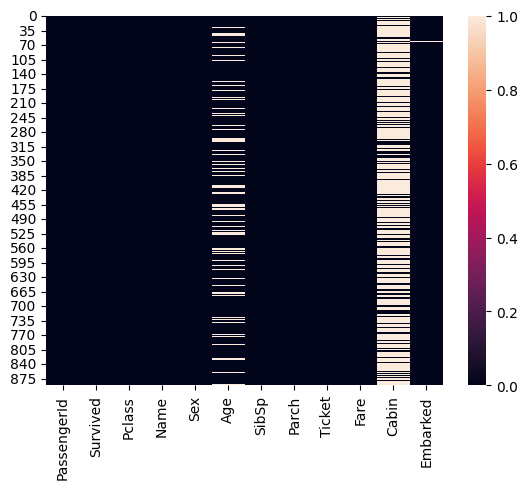

In [3]:
#Checking if there are any null values in the dataframe
sns.heatmap(df.isna())

Verifying null value in Age column after preprocessing:



<Axes: >

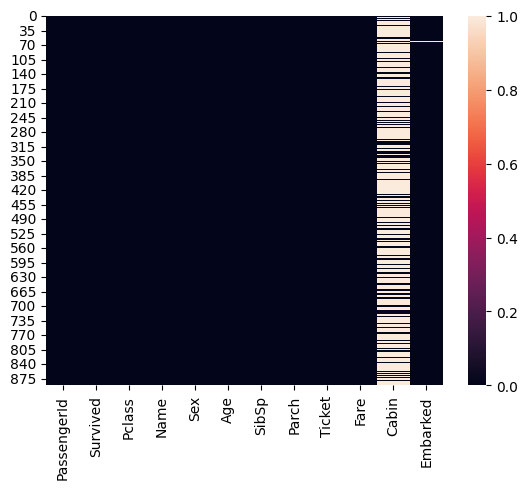

In [4]:
#Data preprocessing - handling null values in Age column by filling with mean age
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)
print('Verifying null value in Age column after preprocessing:\n')
sns.heatmap(df.isna())

In [5]:
#Data preprocessing - encoding Sex column
label_encoder = LabelEncoder() # Creating a LabelEncoder instance
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])
df['Sex_encoded'] = label_encoder.transform(df['Sex'])
print('\n Verifying Sex column after preprocessing:\n')
df['Sex_encoded'].head()


 Verifying Sex column after preprocessing:



0    1
1    0
2    0
3    0
4    1
Name: Sex_encoded, dtype: int64

In [6]:
# dataframe after preprocessing of all required columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


**Logistic Regression**

1) Add a part to the program so that age, gender and ticket class (Pclass) are considered as the input variables (features) for classifying survivors. Construct the logistic regression model and estimate the parameters of the log odd function using the first 200 data points. Print the parameters of the model.

In [7]:
#Using first 200 data points from train.csv for training
train_data = df.iloc[:200] # selected first 200 data points for training
X_train = train_data [['Age', 'Sex_encoded', 'Pclass']] # selected 'Age', 'Sex' and 'Pclass' as input variables (features)
y_train = train_data['Survived'].values.ravel() # assummed 'Survived' colunm as target variable

#Constructing logistic regression model
model_age_gender_Pclass = LogisticRegression()
model_age_gender_Pclass.fit(X_train, y_train)

print('Age, Gender and Pclass (Ticket Class) parameters of the logistic regression model:')
print('\nIntercept:', model_age_gender_Pclass.intercept_)
print('Coefficient for Age:', model_age_gender_Pclass.coef_[0][0])
print('Coefficient for Gender:', model_age_gender_Pclass.coef_[0][1])
print('Coefficient for Ticket Class:', model_age_gender_Pclass.coef_[0][2])

Age, Gender and Pclass (Ticket Class) parameters of the logistic regression model:

Intercept: [3.15392779]
Coefficient for Age: -0.029515126677793265
Coefficient for Gender: -2.488522851428737
Coefficient for Ticket Class: -0.6455815986697615


2) Calculate the value of the log-loss function in this case for the sample points
201 to 240 (average of the penalty for these 40 samples) for this model.

In [8]:
#Using sample points 201 to 240 from train.csv for testing purpose
test_data = df.iloc[200:240]

X_test = test_data[['Age', 'Sex_encoded', 'Pclass']]
y_test = test_data ['Survived']

#Predicting probabilities for the test data using the model
y_prob_age_gender_Pclass = model_age_gender_Pclass.predict_proba(X_test)

#Calculating log-loss for the model with Age, Gender and Pclass as features
log_loss_age_gender_Pclass = log_loss(y_test, y_prob_age_gender_Pclass)

#Printing the log-loss value for Age, Gender and Pclass model
print('Logistic Regression Model:')
print(f'Log Loss for model with Age, Gender and Pclass as a feature: {log_loss_age_gender_Pclass}')

#Constructing individual logistic regression model -
#model with only Age as a feature, only Gender as a feature and only Pclass as a feature
model_age = LogisticRegression()
model_gender = LogisticRegression()
model_Pclass = LogisticRegression()

model_age.fit(X_train[['Age']], y_train)
model_gender.fit(X_train[['Sex_encoded']], y_train)
model_Pclass.fit(X_train[['Pclass']], y_train)

#Predicting probabilities for the test data using the individual model
y_prob_age = model_age.predict_proba(X_test[['Age']])[:,1]
y_prob_gender = model_gender.predict_proba(X_test[['Sex_encoded']])[:,1]
y_prob_Pclass = model_Pclass.predict_proba(X_test[['Pclass']])[:,1]

#Calculating log-loss for the each model
log_loss_age = log_loss(y_test, y_prob_age)
log_loss_gender = log_loss(y_test, y_prob_gender)
log_loss_Pclass = log_loss(y_test, y_prob_Pclass)

#Printing the log-loss for each feature
print(f'\n(Log-loss for Age: {log_loss_age:4f}, Gender: {log_loss_gender:4f}, Pclass: {log_loss_Pclass:4f})')

Logistic Regression Model:
Log Loss for model with Age, Gender and Pclass as a feature: 0.47933336692882217

(Log-loss for Age: 0.628601, Gender: 0.537902, Pclass: 0.612964)


**MLP Neural Network**

3) Add one more part to the program so that the same classification is done
using an MLP neural networks. Assume two hidden layers in the MLP. In
each layer, the number of the neurons are 2+n, where n is the right two most
digits in your MacID card. This means, for instance if your MacID card is,
say, 412345648, then the first hidden layer has 4+2=6 and the second hidden
layer has 8+2=10 neurons. Check both relu and sigmoid activation functions
and use the one with the best accuracy (less loss) for your final network.

In [9]:
#Importing additional libraries
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [10]:
#Calculating the number of neurons for two hidden layers from the last two digits of my MacID = 20
first_hidden_layer = 4 # (2 + 2 = neurons)
second_hidden_layer = 2 # (0 + 2 = 2 neurons)

#Creating MLP models with relu and sigmoid activation functions
relu_mlp_model = MLPClassifier(hidden_layer_sizes = (first_hidden_layer, second_hidden_layer),
                              activation = 'relu',
                              random_state = 1)
sigmoid_mlp_model = MLPClassifier(hidden_layer_sizes = (first_hidden_layer, second_hidden_layer),
                              activation = 'logistic',
                              random_state = 1)

#Training MLP models
relu_mlp_model.fit(X_train, y_train)
sigmoid_mlp_model.fit(X_train, y_train)

#Predicting probability for the test data
y_prob_relu_mlp_model = relu_mlp_model.predict_proba(X_test)[:,1]
y_prob_sigmoid_mlp_model = sigmoid_mlp_model.predict_proba(X_test)[:,1]

4) Calculate and print the value of the loss function for the Neural Network (NN) model.

In [11]:
#Calculating log loss for the test data with MLP models (relu and sigmoid)
log_loss_value_relu = log_loss(y_test, y_prob_relu_mlp_model)
log_loss_value_sigmoid = log_loss(y_test, y_prob_sigmoid_mlp_model)

#Printing log loss values for MLP models
print(f'Log Loss for MLP with Relu: {log_loss_value_relu}')
print(f'Log Loss for MLP with Sigmoid: {log_loss_value_sigmoid}')

#Determining the best activation function based on log-loss
if log_loss_value_relu < log_loss_value_sigmoid:
    log_loss_value = log_loss_value_relu
    activation_function = 'Relu'
else:
    log_loss_value = log_loss_value_sigmoid
    activation_function = 'Sigmoid'

#Printing the best activation fuction with log loss value
print('\nMLP Model:')
print(f'The best activation function is {activation_function} with log loss value of {log_loss_value}')


Log Loss for MLP with Relu: 0.6543412794279171
Log Loss for MLP with Sigmoid: 0.653709920976304

MLP Model:
The best activation function is Sigmoid with log loss value of 0.653709920976304
